<a href="https://colab.research.google.com/github/jed1rey/data_visualization_ipynb/blob/main/Popula%C3%A7%C3%A3o_Mundial_Trabalho_Unifran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/countries-table.csv")

In [ ]:
# Exibir as primeiras linhas do DataFrame
print(df.head())

# Exibir informações sobre o DataFrame
print(df.info())


         country  rank       area  landAreaKm cca2 cca3  netChange  \
0          India     1  3287590.0   2973190.0   IN  IND     0.4184   
1          China     2  9706961.0   9424702.9   CN  CHN    -0.0113   
2  United States     3  9372610.0   9147420.0   US  USA     0.0581   
3      Indonesia     4  1904569.0   1877519.0   ID  IDN     0.0727   
4       Pakistan     5   881912.0    770880.0   PK  PAK     0.1495   

   growthRate  worldPercentage   density  densityMi  place    pop1980  \
0      0.0081           0.1785  480.5033  1244.5036    356  696828385   
1     -0.0002           0.1781  151.2696   391.7884    156  982372466   
2      0.0050           0.0425   37.1686    96.2666    840  223140018   
3      0.0074           0.0347  147.8196   382.8528    360  148177096   
4      0.0198           0.0300  311.9625   807.9829    586   80624057   

      pop2000     pop2010     pop2022     pop2023     pop2030     pop2050  
0  1059633675  1240613620  1417173173  1428627663  1514994080  1

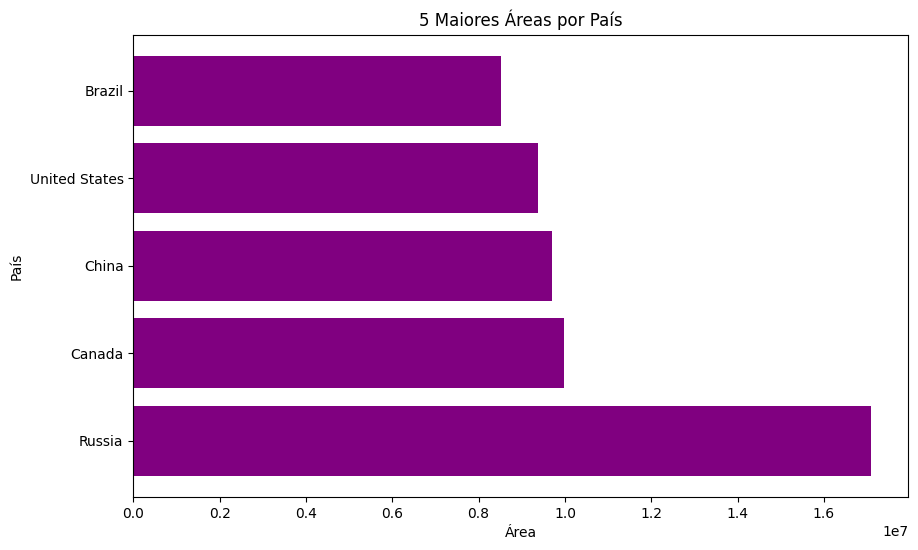

In [ ]:
# Ordenar o DataFrame pelas maiores áreas
top_5_area = df.nlargest(5, 'area')

# Plotar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(top_5_area['country'], top_5_area['area'], color='purple')
plt.xlabel('Área')
plt.ylabel('País')
plt.title('5 Maiores Áreas por País')
plt.show()

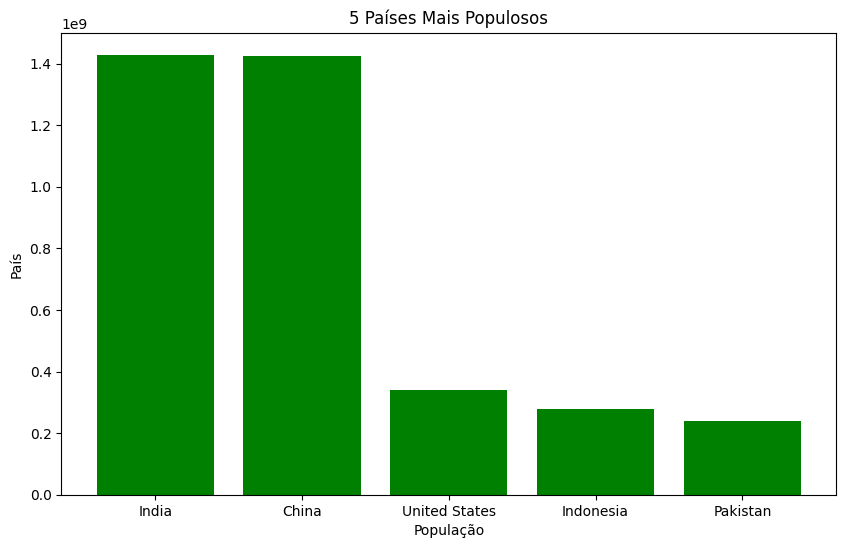

In [ ]:
# Ordenar o DataFrame pelos países mais populosos
top_5_populous = df.nlargest(5, 'pop2023')

# Plotar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.bar(top_5_populous['country'], top_5_populous['pop2023'], color='green')
plt.xlabel('População')
plt.ylabel('País')
plt.title('5 Países Mais Populosos')
plt.show()

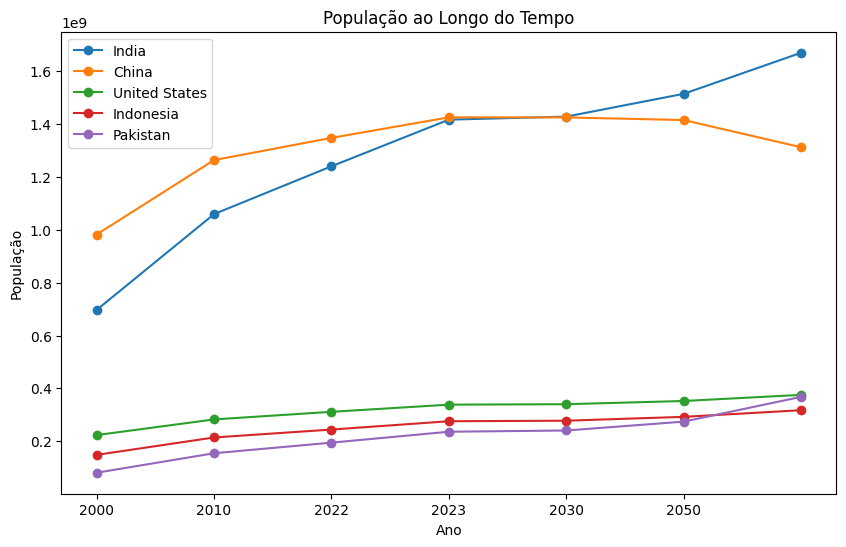

In [ ]:
# Filtrar os cinco países mais populosos
top_5_populous = df.nlargest(5, 'pop2023')

# Selecionar as colunas de população ao longo do tempo
pop_columns = ['pop1980', 'pop2000', 'pop2010', 'pop2022', 'pop2023', 'pop2030', 'pop2050']
top_5_populous = top_5_populous[['country'] + pop_columns]

# Plotar gráfico de linhas
plt.figure(figsize=(10, 6))
for country in top_5_populous['country']:
    plt.plot(pop_columns, top_5_populous.loc[top_5_populous['country'] == country, pop_columns].values.flatten(), marker='o', label=country)
plt.xlabel('Ano')
plt.ylabel('População')
plt.title('População ao Longo do Tempo')
plt.legend()

# Alterar os rótulos do eixo x
plt.xticks(range(len(pop_columns) - 1), [col.replace('pop', '') for col in pop_columns[1:]])

plt.show()



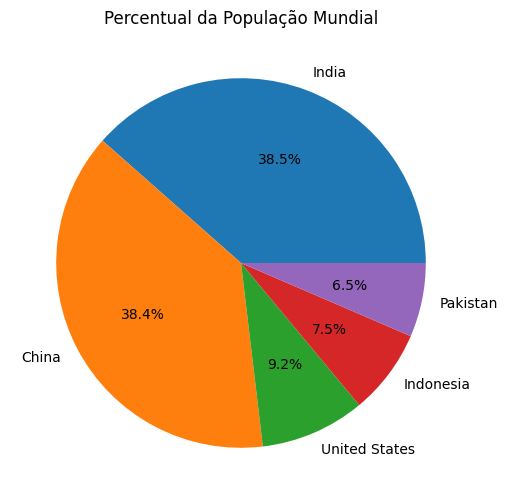

In [ ]:
# Calcular o percentual da população mundial
world_population = top_5_populous['pop2023'].sum()
top_5_populous['population_percentage'] = (top_5_populous['pop2023'] / world_population) * 100

# Plotar gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(top_5_populous['population_percentage'], labels=top_5_populous['country'], autopct='%1.1f%%')
plt.title('Percentual da População Mundial')
plt.show()

